C:\Users\sanja\AppData\Local\Temp\ipykernel_7592\59983968.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\sanja\AppData\Local\Temp\ipykernel_7592\59983968.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
C:\Users\sanja\AppData\Local\Temp\ipykernel_7592\59983968.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

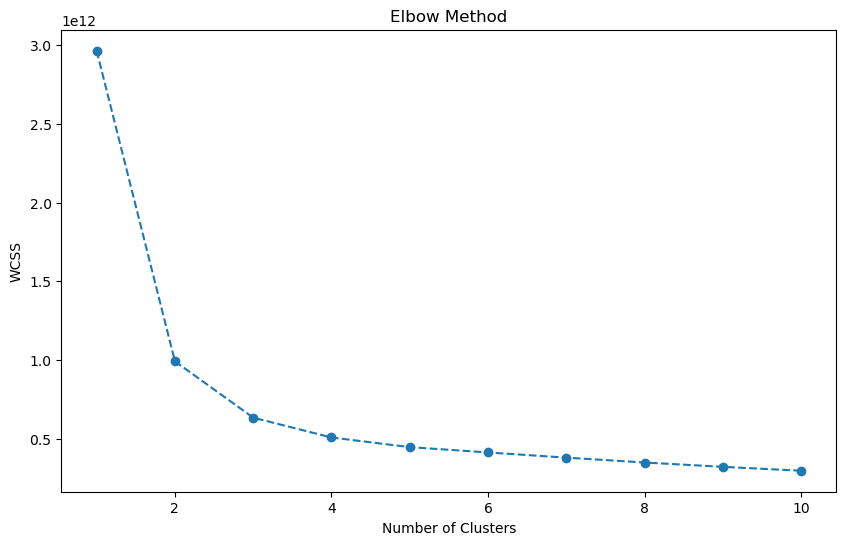

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanja\AppData\Local\Temp\ipykernel_7592\59983968.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data.drop(['first_name', 'last_name', 'email', 'phone'], axis=1))  # Adjust columns as needed


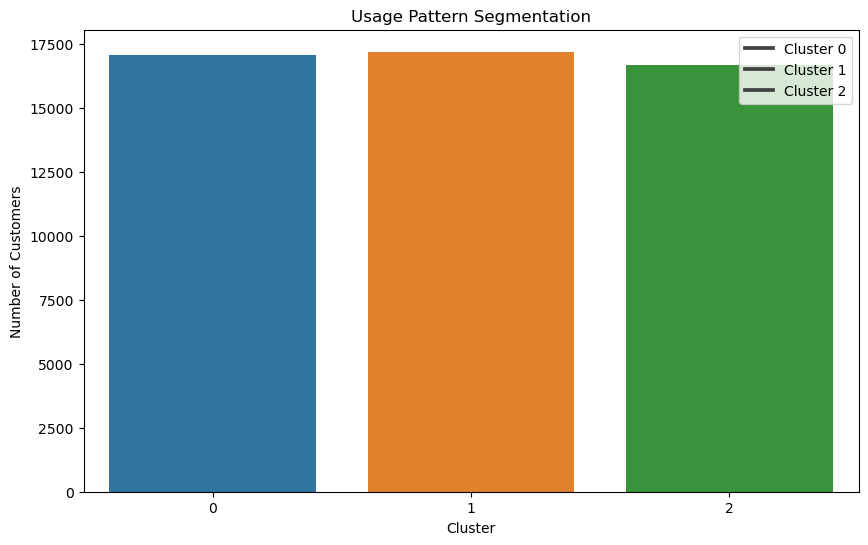

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('Customer Segmentation.csv')

# Select the relevant columns for Usage Pattern Segmentation
selected_columns = ['first_name', 'last_name', 'gender', 'email', 'city', 'country', 'country_code', 'latitude', 'longitude',
                    'phone', 'time_zone', 'company_name', 'department', 'job_title', 'language', 'university', 'linkedin_skill']

# Create a subset of the data with selected columns
data = dataset[selected_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['gender', 'city', 'country', 'country_code', 'company_name', 'department', 'job_title', 'language', 'university', 'linkedin_skill']:
    data[column] = label_encoder.fit_transform(data[column])

# Encode timezone and communication preferences
time_zone_encoder = LabelEncoder()
data['time_zone'] = time_zone_encoder.fit_transform(data['time_zone'])

# Standardize the numeric features
scaler = StandardScaler()
numeric_columns = ['latitude', 'longitude']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data.drop(['first_name', 'last_name', 'email', 'phone'], axis=1))  # Adjust columns as needed
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(data.drop(['first_name', 'last_name', 'email', 'phone'], axis=1))  # Adjust columns as needed

# Count the number of customers in each cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Plot the clusters and their counts with legend
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Usage Pattern Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Adding legend
legend_labels = ['Cluster {}'.format(i) for i in cluster_counts.index]
plt.legend(legend_labels, loc='upper right')

plt.show()
